In [11]:
!pip install tensorflow
!pip install dice-ml
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn
# !pip install -r .\requirements.txt

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.cluster import KMeans


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn.model_selection import cross_val_score

In [13]:
import os

current_path = os.path.dirname(os.getcwd())

DATA_PATH = os.path.join(current_path, 'data\\')
PIG_FILE = 'LivestockSense_PIG_database_060922.xlsx'
POULTRY_FILE = 'LivestockSense_POULTRY_database_060922.xlsx'

In [14]:
no_clusters = 3

FILE = PIG_FILE
file = FILE.split('.')
filename1 = DATA_PATH + 'LivestockSense_PIG_database_060922_encoded_16_11_2022_improved_no_Q2_Q3_Q6.csv'
filename2 = DATA_PATH + 'LivestockSense_POULTRY_database_060922_encoded_16_11_2022_improved_no_Q2_Q3_Q6.csv'

In [15]:
data1 = pd.read_csv(filename1)
data2 = pd.read_csv(filename2)

file = filename1.split('.')
filename = file[0] + '.csv'

data = pd.concat([data1, data2])

# data = data.sample(frac = 1)
data.reset_index(drop=True, inplace=True)
data.head()


# data = data2.copy() # data2 - POULTRY, data1 - PIG

len(data)

266

In [16]:
chosen_cols = ['Q4', 'Q5', 'Q8_a', 'Q8_b', 'Q8_c', 'Q8_d', 'Q8_e',
       'Q8_g', 'Q8_h', 'Q9_a', 'Q9_b', 'Q9_c', 'Q9_d', 'Q9_e',
       'Q10_a', 'Q10_b', 'Q10_c', 'Q10_d', 'Q10_e', 'Q11']

original_data = data.copy()
data = data[chosen_cols]
file = filename.split('.')
filename = file[0] + '_no_u_pu_q.csv'

In [17]:
if 'Q3' in data.columns:
    data['Q3'] = pd.to_numeric(data['Q3'])
    data.fillna(0, inplace=True)
    data = data.astype('int')

data.head()

,Q4,Q5,Q8_a,Q8_b,Q8_c,Q8_d,Q8_e,Q8_g,Q8_h,Q9_a,Q9_b,Q9_c,Q9_d,Q9_e,Q10_a,Q10_b,Q10_c,Q10_d,Q10_e,Q11
0,3.0,2.0,5,4,4,3,4,4,3,5,4,4,5,2,1,5,0,5,5,2
1,2.0,2.0,5,5,1,1,4,4,5,5,3,5,5,5,4,5,2,5,3,3
2,4.0,2.0,4,4,4,5,5,4,5,5,4,4,4,3,4,5,4,5,3,3
3,4.0,2.0,5,5,5,5,5,5,5,5,3,4,5,5,3,4,3,5,4,3
4,2.0,2.0,3,5,4,5,5,3,5,5,4,5,4,4,4,5,0,4,4,3


In [18]:
data

,Q4,Q5,Q8_a,Q8_b,Q8_c,Q8_d,Q8_e,Q8_g,Q8_h,Q9_a,Q9_b,Q9_c,Q9_d,Q9_e,Q10_a,Q10_b,Q10_c,Q10_d,Q10_e,Q11
0,3.0,2.0,5,4,4,3,4,4,3,5,4,4,5,2,1,5,0,5,5,2
1,2.0,2.0,5,5,1,1,4,4,5,5,3,5,5,5,4,5,2,5,3,3
2,4.0,2.0,4,4,4,5,5,4,5,5,4,4,4,3,4,5,4,5,3,3
3,4.0,2.0,5,5,5,5,5,5,5,5,3,4,5,5,3,4,3,5,4,3
4,2.0,2.0,3,5,4,5,5,3,5,5,4,5,4,4,4,5,0,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2.0,2.0,1,4,3,4,4,4,4,5,3,5,4,0,4,4,4,3,0,3
262,2.0,2.0,4,4,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,1
263,4.0,2.0,3,5,3,3,4,4,4,0,0,0,2,2,2,2,2,3,0,3
264,4.0,2.0,5,5,5,5,5,5,5,5,4,5,4,4,4,4,4,5,4,3


Previous dataset
2    121
1     82
0     63
Name: labels, dtype: int64


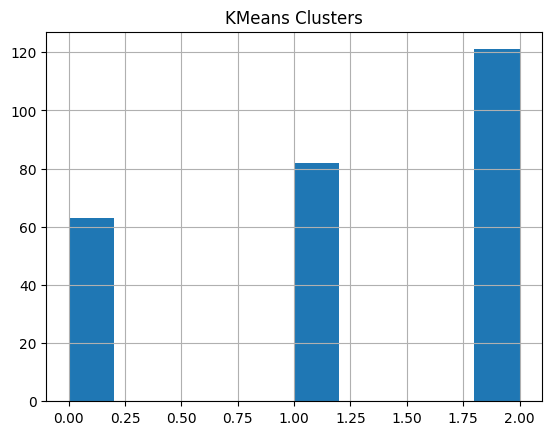

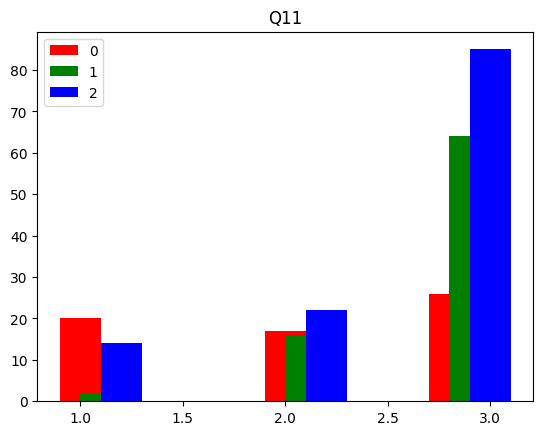

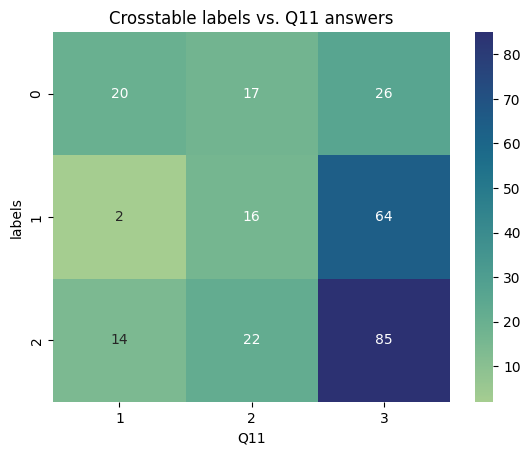

In [19]:
data_encoded = data

km = KMeans(n_clusters=no_clusters, random_state=42)
clusters = km.fit_predict(data_encoded)

#join data with labels 
labels = pd.DataFrame(clusters)
labeledData_kmeans = pd.concat((data, labels),axis=1)
labeledData_kmeans = labeledData_kmeans.rename({0:'labels'},axis=1)
labeledData_kmeans.labels.hist().set(title='KMeans Clusters')

file = filename.split('.')
filename_aux = file[0] + '_kmeans_labels.' + file[1]
labeledData_kmeans.to_csv(filename_aux, index=False)



label_0 = labeledData_kmeans[labeledData_kmeans['labels'] == 0].copy()
label_1 = labeledData_kmeans[labeledData_kmeans['labels'] == 1].copy()
label_2 = labeledData_kmeans[labeledData_kmeans['labels'] == 2].copy()

plt.figure()
question = 'Q11'
plt.hist(label_0[question], color='red', align='left')#.set(title=question)
plt.hist(label_1[question], color='green', align='mid')#.set(title=question)
plt.hist(label_2[question], color='blue', align='right')#.set(title=question)
plt.title(question)
plt.legend(['0', '1', '2'])


plt.figure()
sns.heatmap(pd.crosstab(labeledData_kmeans['labels'], labeledData_kmeans['Q11']), cmap="crest", annot=True).set(title='Crosstable labels vs. Q11 answers')
print('Previous dataset')
print(labeledData_kmeans['labels'].value_counts())


[Text(0.5, 1.0, 'KMeans Clusters')]

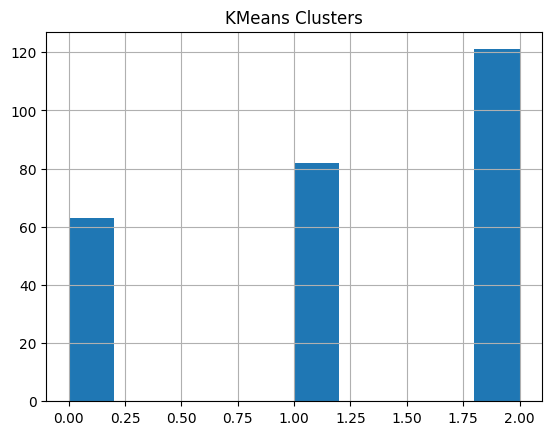

In [20]:
#join data with labels 
labels_c = pd.DataFrame(clusters)
labeledData_c = pd.concat((data, labels_c),axis=1)
labeledData_c = labeledData_c.rename({0:'labels'},axis=1)
labeledData_c.labels.hist().set(title='KMeans Clusters')

In [21]:
###########################################
old_to_new_col = {
    'Q4':'Q1',
    'Q5':'Q2',
    'Q8_a':'Q3_a',
    'Q8_b':'Q3_b',
    'Q8_c':'Q3_c', 
    'Q8_d':'Q3_d', 
    'Q8_e':'Q3_e', 
    'Q8_g':'Q3_f',
    'Q8_h':'Q3_g', 
    'Q9_a':'Q4_a', 
    'Q9_b':'Q4_b', 
    'Q9_c':'Q4_c', 
    'Q9_d':'Q4_d', 
    'Q9_e':'Q4_e', 
    'Q10_a':'Q5_a',
    'Q10_b':'Q5_b',
    'Q10_c':'Q5_c',
    'Q10_d':'Q5_d', 
    'Q10_e':'Q5_e', 
    'Q11':'Q6'
}

# labeledData_kmeans = labeledData_c.copy()

final_labelled_data = labeledData_kmeans.rename(columns=old_to_new_col)
labeledData_kmeans = final_labelled_data.copy()
# final_labelled_data.to_csv('final_labelled_data_17_01_2023.csv', index=False)
aux = final_labelled_data.sample(n=10)

############################################

question = 'labels'
X = labeledData_kmeans.drop(question, axis=1)
y = labeledData_kmeans[question].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf1 = tree.DecisionTreeClassifier(criterion='entropy')#,  min_samples_leaf=3, max_depth=7)
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
scores1 = cross_val_score(clf1, X, y, cv=5)
print('Full tree: {},\n mean:{:.2f}, s.d.:{:.2f}'.format(scores1, scores1.mean(), scores1.std()))

scores2 = cross_val_score(clf2, X, y, cv=5)
print('Pruned tree: {},\n mean:{:.2f}, s.d.:{:.2f}'.format(scores2, scores2.mean(), scores2.std()))

clf = clf1

clf.fit(X_train, y_train)


##### General fitting
# clf1.fit(X, y)
# dt_filename = 'decision_tree_score' + str(scores1.mean() * 100) + '.sav'
# # pickle.dump(clf1, open(dt_filename, 'wb'))
# joblib.dump(clf1, dt_filename)

y_pred = clf.predict(X_test)
# plt.figure(figsize=(24,24))
# tree.plot_tree(clf, feature_names=X.columns)
# plt.suptitle(question)
# accuracy_score(y_test, y_pred)
# plt.savefig(question + 'as_target___dt_17_01_2023.png')


print(confusion_matrix(y_test, y_pred))
print("\n\nAccuracy:{:,.2f}%".format(accuracy_score(y_test, y_pred)*100))

feature_importances = pd.DataFrame(clf.feature_importances_,
                                index = X_train.columns,
                                columns = ['importance']).sort_values('importance', 
                                                                ascending=False)

print(feature_importances)

Full tree: [0.7962963  0.81132075 0.79245283 0.71698113 0.69811321],
 mean:0.76, s.d.:0.05
Pruned tree: [0.85185185 0.69811321 0.8490566  0.67924528 0.66037736],
 mean:0.75, s.d.:0.08
[[16  0  5]
 [ 0 17  3]
 [ 3  7 16]]


Accuracy:73.13%
      importance
Q4_c    0.309792
Q5_c    0.154621
Q3_a    0.143501
Q5_b    0.081483
Q4_a    0.073137
Q4_e    0.057747
Q3_f    0.034095
Q4_b    0.031640
Q5_e    0.029625
Q2      0.023068
Q1      0.018352
Q3_c    0.013747
Q3_e    0.013337
Q3_b    0.009186
Q5_d    0.006669
Q3_g    0.000000
Q4_d    0.000000
Q5_a    0.000000
Q3_d    0.000000
Q6      0.000000


In [22]:
X_train

,Q1,Q2,Q3_a,Q3_b,Q3_c,Q3_d,Q3_e,Q3_f,Q3_g,Q4_a,Q4_b,Q4_c,Q4_d,Q4_e,Q5_a,Q5_b,Q5_c,Q5_d,Q5_e,Q6
79,4.0,1.0,3,5,4,5,5,4,4,5,3,5,4,4,5,5,5,5,5,2
55,2.0,2.0,3,5,4,3,5,4,4,2,1,2,1,2,0,3,3,4,4,1
224,3.0,2.0,1,1,0,0,1,1,1,1,0,5,0,0,0,0,0,0,0,2
190,2.0,2.0,5,5,0,5,5,5,5,0,0,0,0,0,5,5,5,5,5,3
38,2.0,2.0,2,1,1,1,3,3,4,4,4,4,3,3,3,4,3,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,2.0,2.0,5,4,5,4,5,4,5,5,3,5,4,5,3,5,4,5,5,3
188,4.0,2.0,1,5,3,5,5,4,5,5,3,5,0,0,3,5,3,0,0,3
71,2.0,2.0,1,1,2,1,2,1,1,2,1,2,1,2,1,2,1,1,1,1
106,4.0,2.0,5,5,3,3,5,3,5,3,3,1,1,2,3,3,3,4,0,3


Root Mean Squared Error: 0.8277591347639633


C:\Users\lcorpaci\AppData\Local\Temp\ipykernel_11768\3589028218.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])


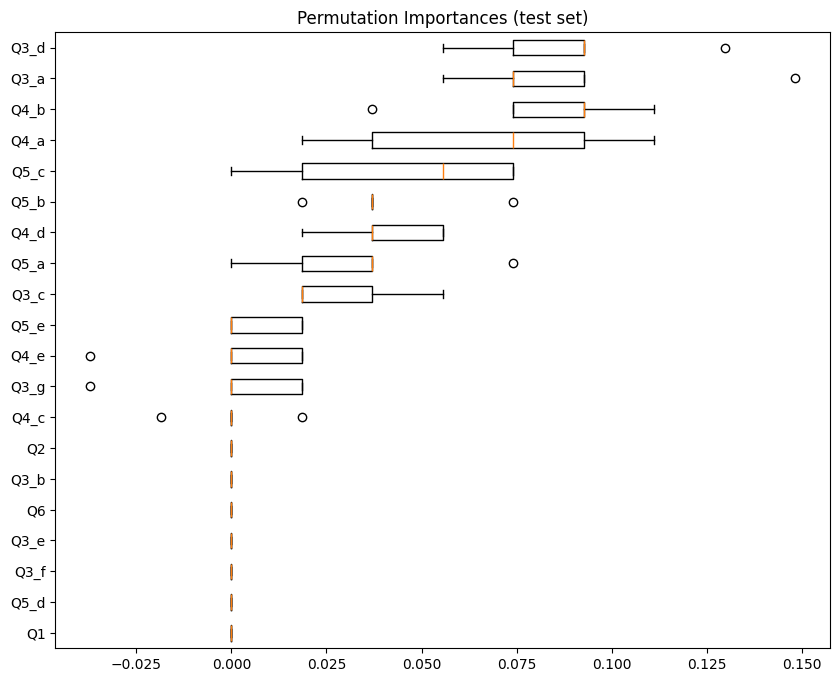

In [23]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Convert clusters to numerical values
labeledData_kmeans[question + '_numeric'] = labeledData_kmeans[question].replace({0: 1, 1: 2, 2: 3})

X = labeledData_kmeans.drop(columns=[question, question + '_numeric'])
y = labeledData_kmeans[question + '_numeric']

# Train regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = tree_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Step 4: Detailed Feature Importance
# Use permutation importance for a more detailed analysis
perm_importance = permutation_importance(tree_reg, X_test, y_test, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 8))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.show()

In [24]:
!pip install shap


  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached llvmlite-0.42.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
   ---------------------------------------- 0.0/455.5 kB ? eta -:--:--
   ----------------- ---------------------- 194.6/455.5 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------  450.6/455.5 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 455.5/455.5 kB 4.7 MB/s eta 0:00:00
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --------- ------------------------------ 0.7/2.6 MB 20.8 MB/s eta 0:00:01
   ----------------------- ---------------- 1.5/2.6 MB 19.4 MB/s eta 0:00:01
   ------------------------------- -------- 2.1/2.6 MB 16.5 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 14.0 MB/s eta 0:00:00
Using cached llvmlite-0.42.0-cp311-cp311-win_amd64.whl (28.1 MB)


### Linear Regression

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = lin_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Linear Regression RMSE: {rmse}')

Linear Regression RMSE: 0.724901472472352


c:\Users\lcorpaci\Documents\SBA\Projects\Livestock_Senses\Livestock_explainable_regression\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regression model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = tree_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Decision Tree Regression RMSE: {rmse}')

Decision Tree Regression RMSE: 0.7071067811865476


c:\Users\lcorpaci\Documents\SBA\Projects\Livestock_Senses\Livestock_explainable_regression\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest Regression with SHAP explainability

c:\Users\lcorpaci\Documents\SBA\Projects\Livestock_Senses\Livestock_explainable_regression\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Random Forest Regression RMSE: 0.6029418619476415


c:\Users\lcorpaci\Documents\SBA\Projects\Livestock_Senses\Livestock_explainable_regression\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


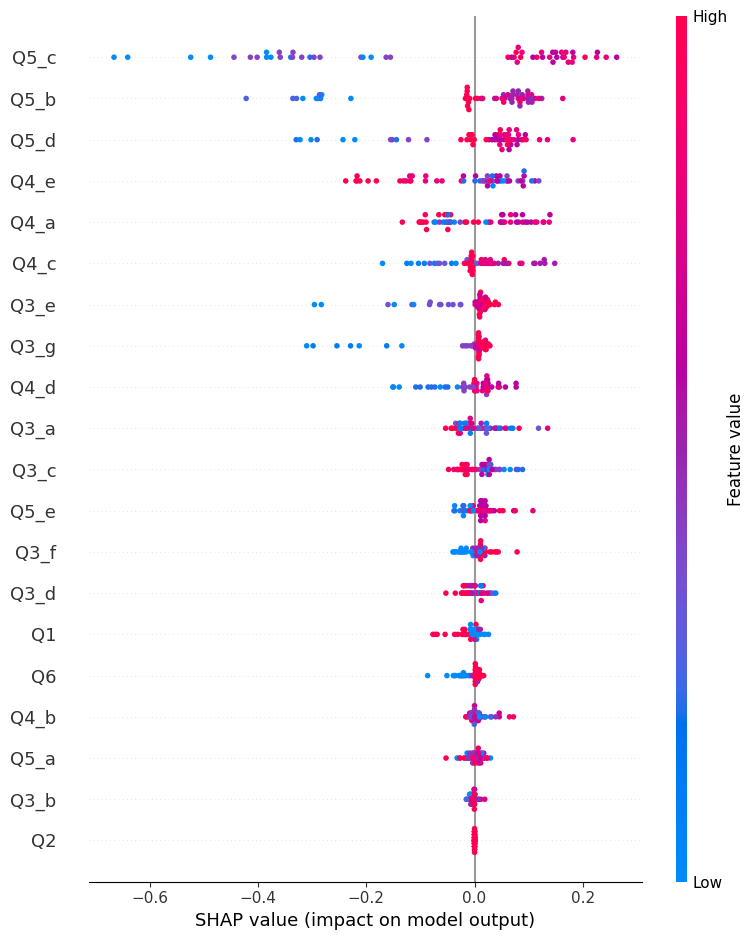

In [27]:
from sklearn.ensemble import RandomForestRegressor
import shap

# Train Random Forest Regression model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = rf_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Random Forest Regression RMSE: {rmse}')

# SHAP values for explainability
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_test)

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test)

### Gradient Boosting Regressor

c:\Users\lcorpaci\Documents\SBA\Projects\Livestock_Senses\Livestock_explainable_regression\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regression RMSE: 0.5766927134991883


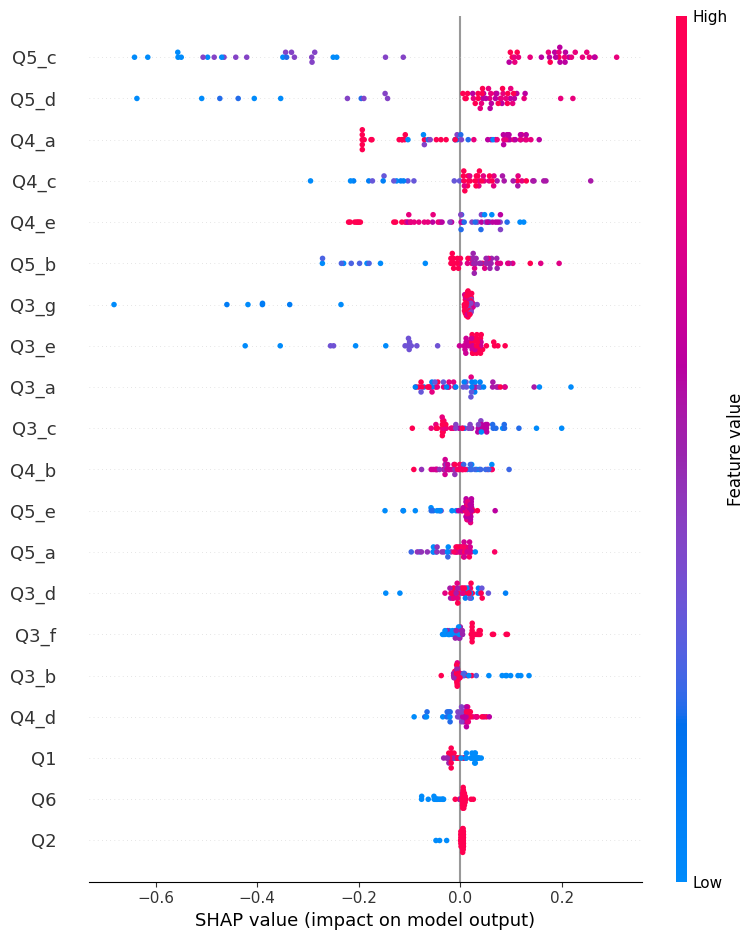

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regression model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = gb_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Gradient Boosting Regression RMSE: {rmse}')

# SHAP values for explainability
explainer = shap.TreeExplainer(gb_reg)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance summary
shap.summary_plot(shap_values, X_test)

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


# Counterfactual explanations

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import dice_ml
from dice_ml.utils import helpers
import matplotlib.pyplot as plt

In [36]:
X = labeledData_kmeans.drop(columns=[question, question + '_numeric'])
y = labeledData_kmeans[question + '_numeric']

# Train regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Use the test set for generating counterfactual explanations
# instance_to_explain = X_test.iloc[0]  # Selecting the first instance from the test set

# Convert the data to a format suitable for DiCE
X_train[question] = y_train

# Initialize DiCE model
data_dice = dice_ml.Data(dataframe=X_train, continuous_features=X.columns.tolist(), outcome_name=question)
model_dice = dice_ml.Model(model=tree_clf, backend="sklearn")

# Initialize DiCE explainer
exp = dice_ml.Dice(data_dice, model_dice, method="random")


instance_to_explain = X_test.iloc[0].to_frame().T  # Convert to DataFrame
current_prediction = tree_clf.predict(instance_to_explain)[0]

# Set a desired class different from the current prediction
desired_class = 2 if current_prediction == 3 else 1

# Generate counterfactual explanations
e = exp.generate_counterfactuals(instance_to_explain, total_CFs=5, desired_class=desired_class)

# Visualize the counterfactual explanations
e.visualize_as_dataframe()

# Plot the counterfactual explanations
e.visualize_as_list()

100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

Query instance (original outcome : 3)


,Q1,Q2,Q3_a,Q3_b,Q3_c,Q3_d,Q3_e,Q3_f,Q3_g,Q4_a,...,Q4_c,Q4_d,Q4_e,Q5_a,Q5_b,Q5_c,Q5_d,Q5_e,Q6,labels
0,4.0,2.0,2.0,3.0,1.0,2.0,4.0,3.0,4.0,4.0,...,4.0,1.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0,3



Diverse Counterfactual set (new outcome: 3)


,Q1,Q2,Q3_a,Q3_b,Q3_c,Q3_d,Q3_e,Q3_f,Q3_g,Q4_a,...,Q4_c,Q4_d,Q4_e,Q5_a,Q5_b,Q5_c,Q5_d,Q5_e,Q6,labels
0,3.2,2.0,2.0,3.0,1.0,2.0,4.0,3.0,4.0,4.0,...,4.0,1.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0,3
1,4.0,2.0,2.0,3.0,1.0,2.0,0.0,3.0,4.0,4.0,...,4.0,1.0,2.0,2.0,3.0,3.0,0.0,3.0,3.0,3
2,4.0,1.7,2.0,3.0,1.0,2.0,4.0,0.0,4.0,4.0,...,4.0,1.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0,3
3,4.0,2.0,2.0,3.0,1.0,4.0,4.0,3.0,4.0,4.0,...,4.0,1.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,3
4,4.0,2.0,2.0,3.0,1.0,2.0,4.0,3.0,4.0,2.0,...,4.0,1.0,2.0,2.0,3.0,3.0,4.0,1.0,3.0,3


Query instance (original outcome : 3)
[4.0, 2.0, 2.0, 3.0, 1.0, 2.0, 4.0, 3.0, 4.0, 4.0, 1.0, 4.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0]

Diverse Counterfactual set (new outcome: 3)
[3.2, 2.0, 2.0, 3.0, 1.0, 2.0, 4.0, 3.0, 4.0, 4.0, 1.0, 4.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0]
[4.0, 2.0, 2.0, 3.0, 1.0, 2.0, 0.0, 3.0, 4.0, 4.0, 1.0, 4.0, 1.0, 2.0, 2.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0]
[4.0, 1.7, 2.0, 3.0, 1.0, 2.0, 4.0, 0.0, 4.0, 4.0, 1.0, 4.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0]
[4.0, 2.0, 2.0, 3.0, 1.0, 4.0, 4.0, 3.0, 4.0, 4.0, 1.0, 4.0, 1.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0]
[4.0, 2.0, 2.0, 3.0, 1.0, 2.0, 4.0, 3.0, 4.0, 2.0, 1.0, 4.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 1.0, 3.0, 3.0]
